In [1]:
import matlab.engine
eng = matlab.engine.start_matlab()

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [3]:
mpl.rc('figure', figsize=(12, 9))
mpl.rcParams.update({'text.usetex': False,
                     'font.family': 'serif',
                     'font.serif': 'Georgia',
                     'mathtext.fontset': 'cm',
                     'lines.linewidth': 2,
                     'font.size': 16,
                     'legend.loc': 'best',
                     'savefig.dpi': 80,
                     'pdf.compression': 9})

In [4]:
import pytickle as pyt

In [5]:
reload(pyt);

In [6]:
pyt.addOpticklePath(eng)

In [7]:
Pin = 10
Larm = 1e3

opt = pyt.PyTickle(eng, 'opt')

opt.addMirror('EM', Thr=0, Chr=1e-6)
opt.addMirror('IM', Thr=0.01, Chr=1e-6)
opt.addLink('IM', 'fr', 'EM', 'fr', Larm)
opt.addLink('EM', 'fr', 'IM', 'fr', Larm)

opt.addSource('Laser', np.sqrt(Pin))
opt.addModulator('AM', 1)
opt.addModulator('PM', 1j)
opt.addLink('Laser', 'out', 'AM', 'in', 0)
opt.addLink('AM', 'out', 'PM', 'in', 0)
opt.addLink('PM', 'out', 'IM', 'bk', 0)

opt.setCavityBasis('IM', 'EM')

opt.addHomodyneReadout('REFL', 90, BnC=False)
opt.addLink('IM', 'bk', 'REFL_BS', 'fr', 0)

In [8]:
ff = np.logspace(1, 4, 500)

In [9]:
opt.tickle(ff)

In [10]:
opt.showfDC()

Link                          |       DC|
_________________________________________
IM->fr --> EM<-fr             |   4.0 kW|
EM->fr --> IM<-fr             |   4.0 kW|
Laser->out --> AM<-in         |   10.0 W|
AM->out --> PM<-in            |   10.0 W|
PM->out --> IM<-bk            |   10.0 W|
_________________________________________
REFL_LO->out --> REFL_BS<-bk  |    1.0 W|
REFL_BS->fr --> REFL_attnA<-in|    5.5 W|
REFL_attnA->out --> REFL_A<-in|    5.5 W|
REFL_BS->bk --> REFL_attnB<-in|    5.5 W|
REFL_attnB->out --> REFL_B<-in|    5.5 W|
_________________________________________
IM->bk --> REFL_BS<-fr        |   10.0 W|


In [11]:
opt.showsigDC()

Probe    | Power     |
______________________
REFL_SUM |      5.5 W|
REFL_DIFF|      5.5 W|


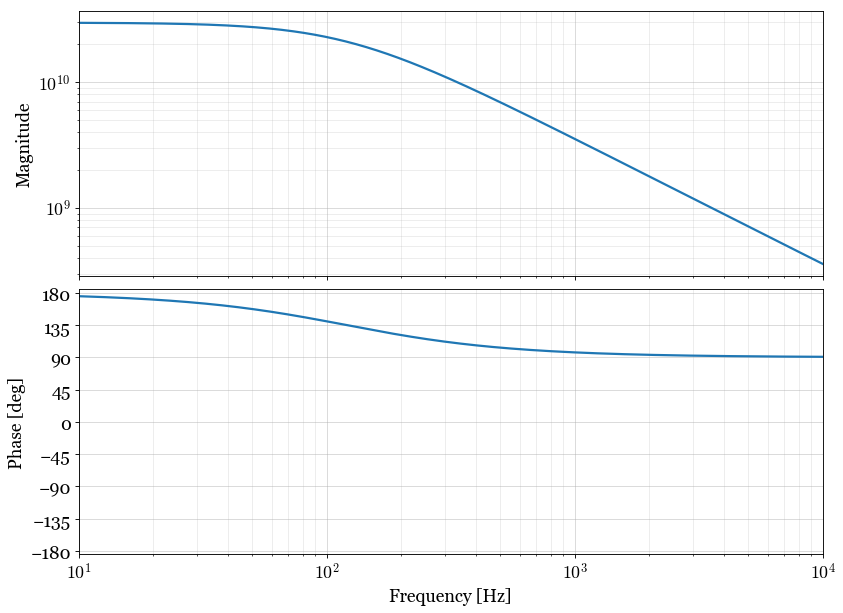

In [12]:
opt.plotTF('REFL_DIFF', 'EM.pos');

In [13]:
opt.tickle(ff, dof='yaw')
opt.tickle(ff, dof='pitch')

In [14]:
tf = opt.getAngularTF('REFL_DIFF', 'EM.pos', 'pitch', 'IM', 'fr')

In [15]:
tf2 = opt.getAngularTF('REFL_DIFF', 'IM.pos', 'yaw', 'IM', 'fr')

In [16]:
tf3 = opt.getAngularTF('REFL_DIFF', 'EM.pos', 'pitch')

In [21]:
tf3 = opt.getAngularTF('REFL_DIFF', 'IM.pos', 'yaw', 'IM', 'fr')